In [33]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import math
import pandas as pd

## Loading the Dataset

In [34]:
g = nx.davis_southern_women_graph()
women = g.graph['top']
clubs = g.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(g, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


## Creating the Bipartite Graph


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


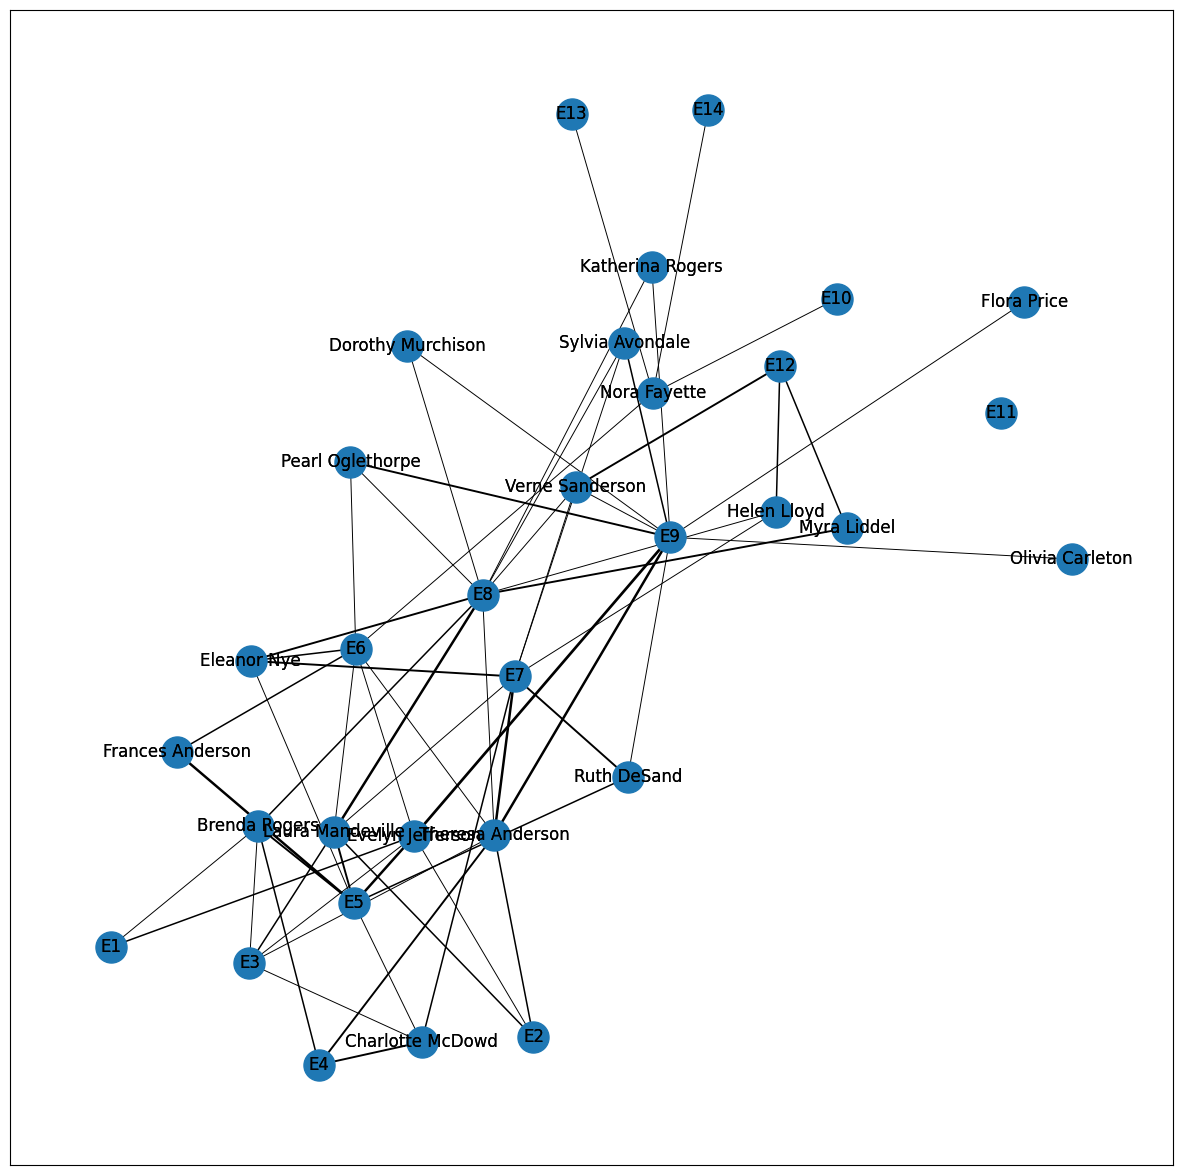

In [35]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(g, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(g, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

plt.figure(figsize=(15,15))
pos = nx.spring_layout(g, seed=648)  # Seed layout for reproducible node positions
weights = [math.log(edata['weight']) for f, t, edata in W.edges(data = True)]
nx.draw_networkx(g, pos, with_labels=True, node_size =  500, width = weights)
nx.draw_networkx_labels(g, pos)
plt.show()

## Calculating Degree Centrality

In [48]:
degree_centrality = nx.bipartite.degree_centrality(g, women)

women = pd.DataFrame(women)
women['centrality'] = women[0].map(degree_centrality)

women = women.sort_values(by = 'centrality', ascending = False)

clubs = pd.DataFrame(clubs)
clubs['centrality'] = clubs[0].map(degree_centrality)

clubs = clubs.sort_values(by = 'centrality', ascending = False)

display(women)
display(clubs)

,0,centrality
0,Evelyn Jefferson,4.0
13,Nora Fayette,4.0
2,Theresa Anderson,4.0
1,Laura Mandeville,3.5
12,Sylvia Avondale,3.5
3,Brenda Rogers,3.5
11,Katherina Rogers,3.0
14,Helen Lloyd,2.5
6,Eleanor Nye,2.0
4,Charlotte McDowd,2.0


,0,centrality
7,E8,7.0
8,E9,6.0
6,E7,5.0
4,E5,4.0
5,E6,4.0
2,E3,3.0
11,E12,3.0
9,E10,2.5
3,E4,2.0
10,E11,2.0


## Interpretations

Based on the analyses above, we can see that the women are all well-connected with each other , and typically attend the same events. The nodal network above shows us that events 8 and 9 are the most highly weighted and they appear to have the most connections. The bipartite degree centrality charts indicate that Evelyn and Nora have the most connections in this network, whereas Dorothy, Olivia, and Flora have the fewest connections. In addition, to confirm the findings in the nodal network graph, we can see, based on the degree centrality, that events 8 and 9 have the most connections.